In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file = 'posts-en.csv'

In [3]:
posts = pd.read_csv(file)
print(posts.columns)
print(f'# of Posts: {posts.shape[0]}')

Index(['Unnamed: 0', 'keyword', 'title', 'author', 'body', 'time', 'date',
       'status', 'votes', 'num_comments', 'num_comment_pages', 'link', 'lang'],
      dtype='object')
# of Posts: 911


In [4]:
impl_posts = posts[(posts['keyword'] == 'implemented')]

# implemented & votes correlation, avg vote number of implemented posts
avg_votes = impl_posts.votes.mean()
print(f'Average # of Votes for Implemented Ideas: {avg_votes}')

# implemented & num of comments correlation, avg comment number of implemented posts
avg_comments = impl_posts.num_comments.mean()
print(f'Average # of Comments for Implemented Ideas: {avg_comments}')

# implemented & length of posts correlation, avg length of an implemented post
body_length = impl_posts.body.apply(lambda x: len(x.split()))
avg_length = body_length.mean()
print(f'Average # of Body Length for Implemented Ideas: {avg_length}')

Average # of Votes for Implemented Ideas: 1471.8449367088608
Average # of Comments for Implemented Ideas: 219.74683544303798
Average # of Body Length for Implemented Ideas: 90.29430379746836


Text(0, 0.5, '# of Times')

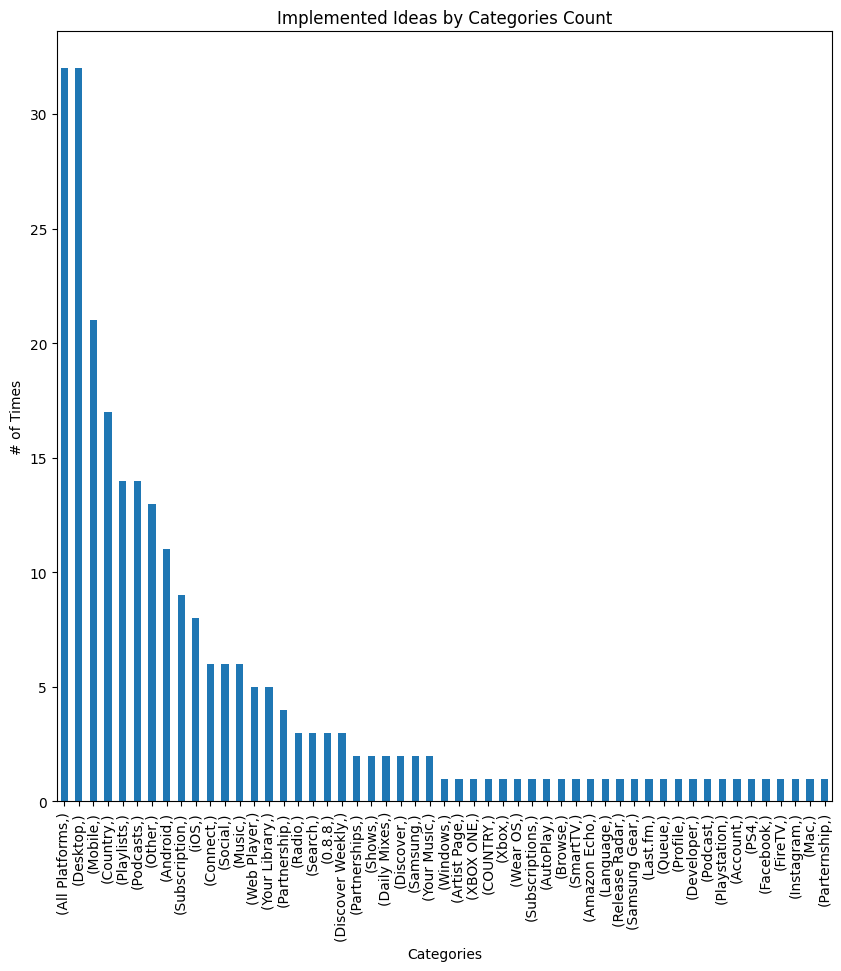

In [11]:
# posts categories
categories = impl_posts.title.str.extractall(r'\[(.*?)\]')

# ax = categories.value_counts().plot(kind='bar', figsize=(30, 15), title='Implemented Ideas by Categories Count')
ax = categories.value_counts().plot(kind='bar', figsize=(10, 10), title='Implemented Ideas by Categories Count')
ax.set_xlabel('Categories')
ax.set_ylabel('# of Times')

In [12]:
categories.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

All Platforms      12.6%
Desktop            12.6%
Mobile              8.3%
Country             6.7%
Playlists           5.5%
Podcasts            5.5%
Other               5.1%
Android             4.3%
Subscription        3.5%
iOS                 3.1%
Connect             2.4%
Social              2.4%
Music               2.4%
Web Player          2.0%
Your Library        2.0%
Partnership         1.6%
Radio               1.2%
Search              1.2%
0.8.8               1.2%
Discover Weekly     1.2%
Partnerships        0.8%
Shows               0.8%
Daily Mixes         0.8%
Discover            0.8%
Samsung             0.8%
Your Music          0.8%
Windows             0.4%
Artist Page         0.4%
XBOX ONE            0.4%
COUNTRY             0.4%
Xbox                0.4%
Wear OS             0.4%
Subscriptions       0.4%
AutoPlay            0.4%
Browse              0.4%
SmartTV             0.4%
Amazon Echo         0.4%
Language            0.4%
Release Radar       0.4%
Samsung Gear        0.4%


<Axes: ylabel='keyword'>

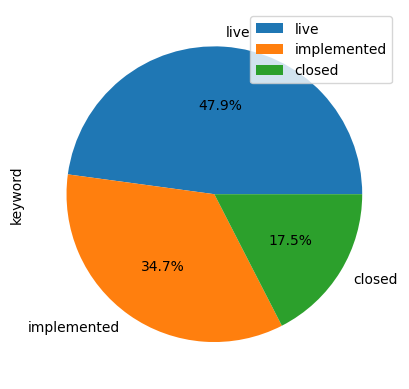

In [13]:
# Idea status distribution
posts.keyword.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True)

Text(0, 0.5, '# of Times')

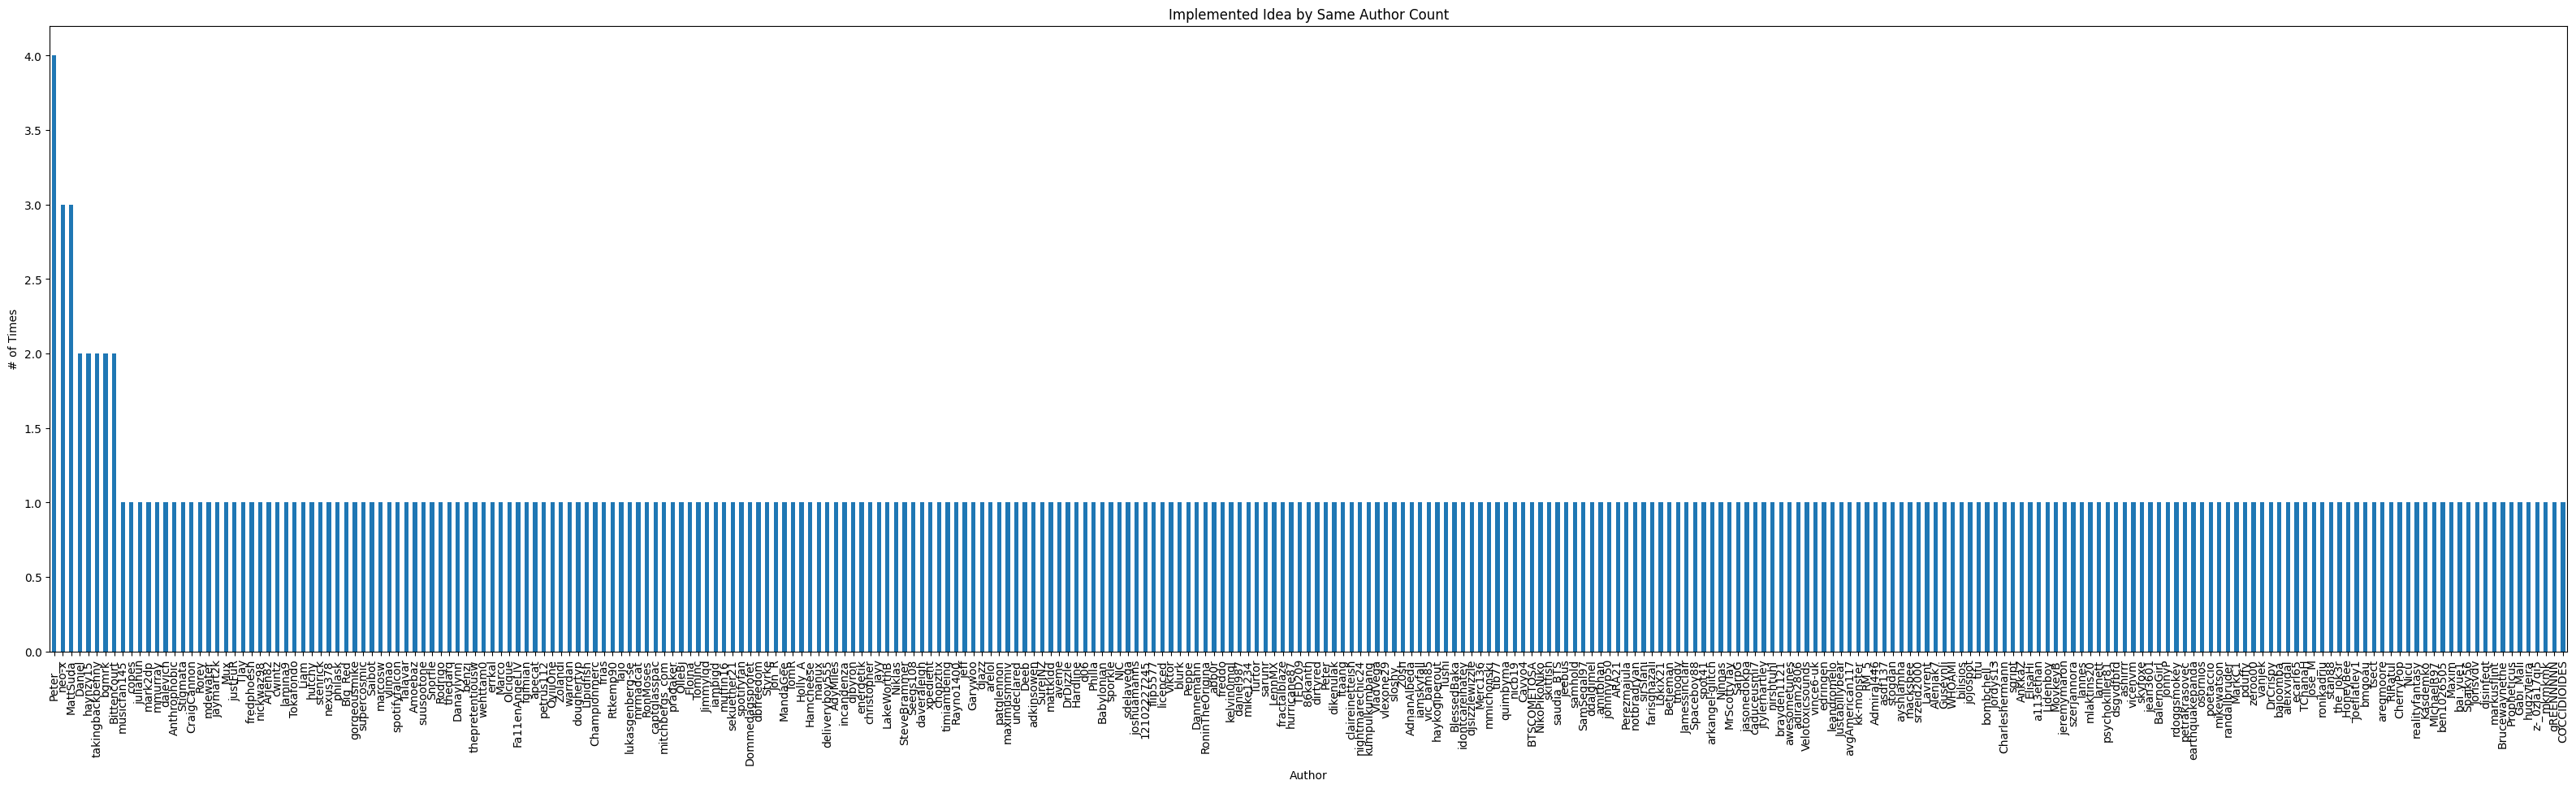

In [23]:
# implemented & author correlation
same_author_count = posts[(posts['keyword'] == 'implemented') & (posts['author'] != 'user-removed')].author.value_counts()
ax = same_author_count.plot(kind='bar', figsize=(40, 10), title='Implemented Idea by Same Author Count')
ax.set_xlabel('Author')
ax.set_ylabel('# of Times')

In [15]:
same_author_count

Peter__         4
neo-x           3
MattSuda        3
Daniel          2
haynzy15        2
               ..
hugzvieira      1
z-_0zia17qi5    1
mkmkmk          1
gREENNNNN       1
COCCIDIOIDES    1
Name: author, Length: 293, dtype: int64

1    285
2      5
3      2
4      1
Name: author, dtype: int64


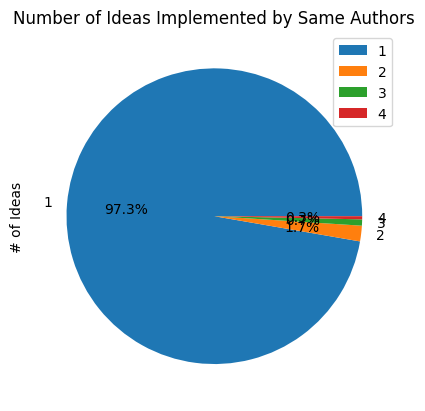

In [30]:
# Percentage distribution of same author ideas implemented N=[1, 2, 3, 4] # of times
ax = same_author_count.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Number of Ideas Implemented by Same Authors')
ax.set_ylabel('# of Ideas')
print(same_author_count.value_counts())

Text(0, 0.5, 'Ideas')

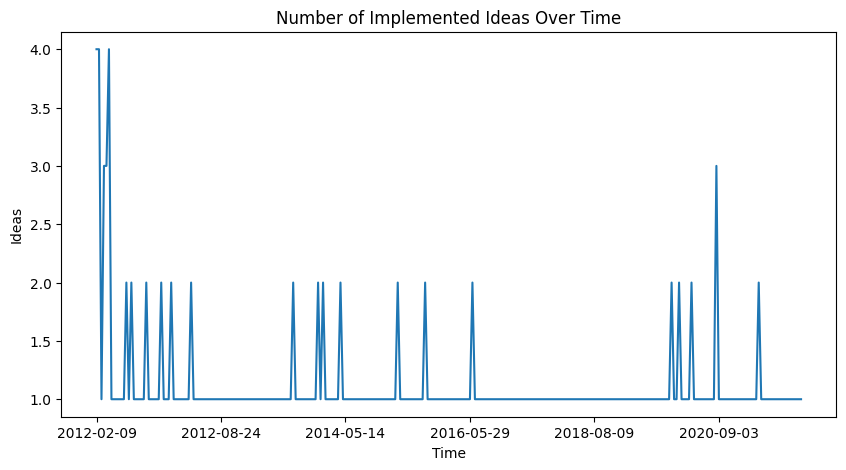

In [37]:
# implemented ideas over time
count_ideas_time = impl_posts.date.value_counts(sort=False)[::-1]
ax = count_ideas_time.plot(figsize=(10, 5), title='Number of Implemented Ideas Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Ideas')

In [74]:
all_ideas_year = posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
all_ideas_year

2012     99
2013     28
2014     30
2015     48
2016     45
2017     35
2018     54
2019     56
2020     86
2021     91
2022     46
2023    293
dtype: int64

In [71]:
count_ideas_year

2012    85
2013    26
2014    22
2015    36
2016    24
2017    17
2018    24
2019    14
2020    47
2021    19
2022     2
dtype: int64

In [79]:
print('Percentage of Ideas Being Implemented Every Year: ')
print((count_ideas_year/all_ideas_year)*100)

Percentage of Ideas Being Implemented Every Year: 
2012    85.858586
2013    92.857143
2014    73.333333
2015    75.000000
2016    53.333333
2017    48.571429
2018    44.444444
2019    25.000000
2020    54.651163
2021    20.879121
2022     4.347826
2023          NaN
dtype: float64


Text(0, 0.5, 'Ideas')

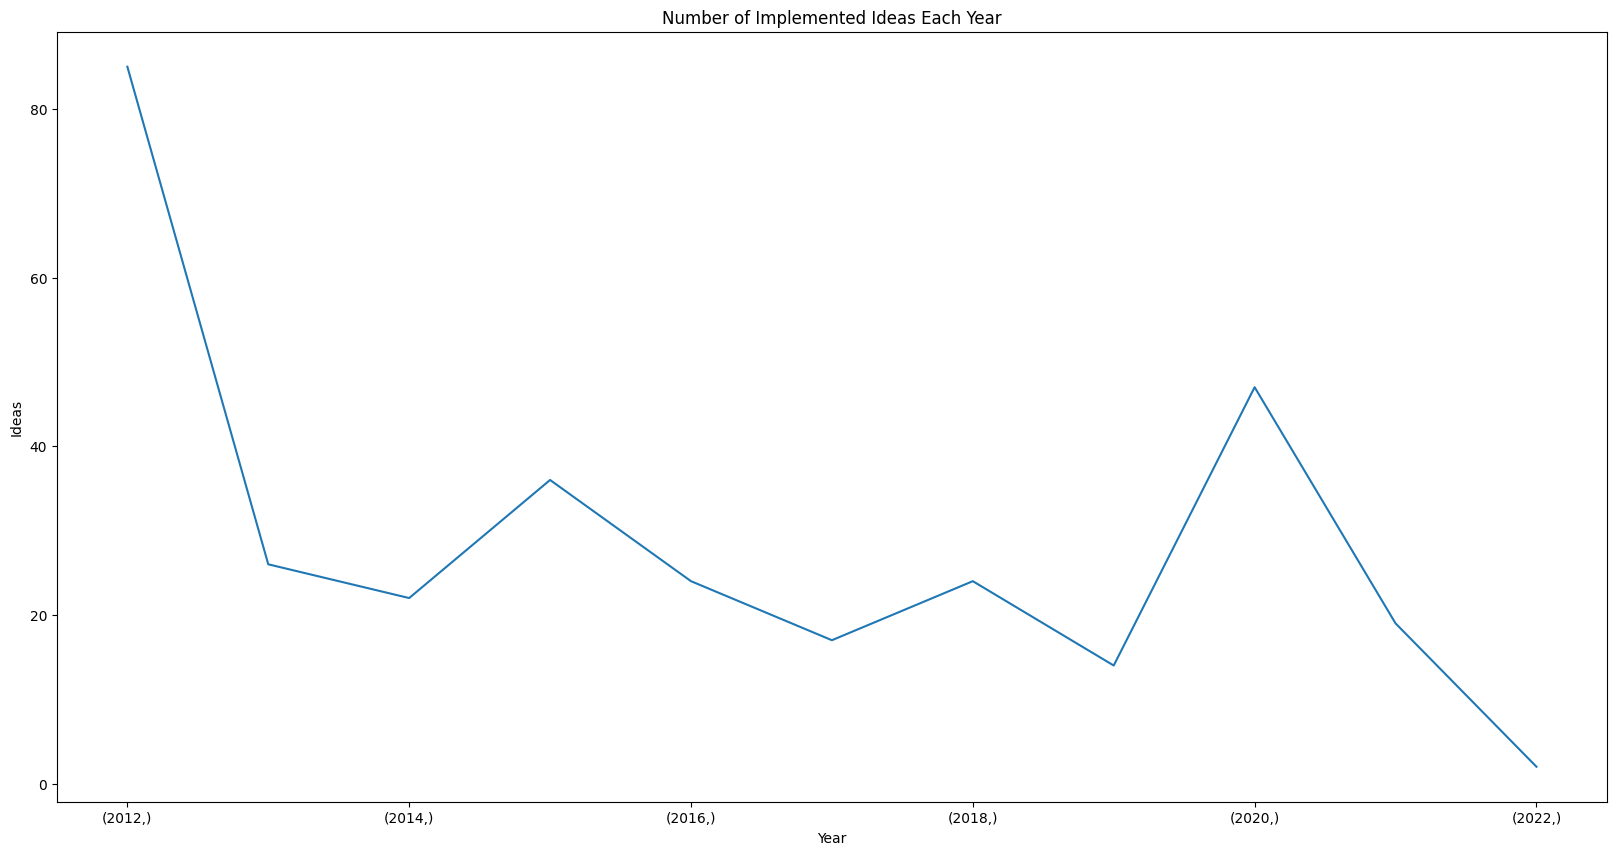

In [80]:
count_ideas_year = impl_posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
ax = count_ideas_year.plot(figsize=(20, 10), title='Number of Implemented Ideas Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Ideas')